# Linear Mixed Effects Models

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.tools.sm_exceptions import ConvergenceWarning

In [2]:
data = sm.datasets.get_rdataset("dietox", "geepack").data

In [3]:
data.head()

,Pig,Evit,Cu,Litter,Start,Weight,Feed,Time
0,4601,Evit000,Cu000,1,26.5,26.50000,NaN,1
1,4601,Evit000,Cu000,1,26.5,27.59999,5.200005,2
2,4601,Evit000,Cu000,1,26.5,36.50000,17.600000,3
3,4601,Evit000,Cu000,1,26.5,40.29999,28.500000,4
4,4601,Evit000,Cu000,1,26.5,49.09998,45.200001,5


In [4]:
model = smf.mixedlm("Weight~Time", data, groups=data["Pig"])
res = model.fit(method=["lbfgs"])
res.summary()

<class 'statsmodels.iolib.summary2.Summary'>
"""
         Mixed Linear Model Regression Results
========================================================
Model:            MixedLM Dependent Variable: Weight    
No. Observations: 861     Method:             REML      
No. Groups:       72      Scale:              11.3669   
Min. group size:  11      Log-Likelihood:     -2404.7753
Max. group size:  12      Converged:          Yes       
Mean group size:  12.0                                  
--------------------------------------------------------
             Coef.  Std.Err.    z    P>|z| [0.025 0.975]
--------------------------------------------------------
Intercept    15.724    0.788  19.952 0.000 14.179 17.268
Time          6.943    0.033 207.939 0.000  6.877  7.008
Group Var    40.395    2.149                            
========================================================

"""

In [5]:
model_2 = smf.mixedlm("Weight~Time", data,groups=data['Pig'], re_formula="~Time")
res_2 = model_2.fit(method=["lbfgs"])
res_2.summary()

<class 'statsmodels.iolib.summary2.Summary'>
"""
           Mixed Linear Model Regression Results
===========================================================
Model:             MixedLM  Dependent Variable:  Weight    
No. Observations:  861      Method:              REML      
No. Groups:        72       Scale:               6.0372    
Min. group size:   11       Log-Likelihood:      -2217.0475
Max. group size:   12       Converged:           Yes       
Mean group size:   12.0                                    
-----------------------------------------------------------
                 Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-----------------------------------------------------------
Intercept        15.739    0.550 28.603 0.000 14.660 16.817
Time              6.939    0.080 86.925 0.000  6.783  7.095
Group Var        19.503    1.561                           
Group x Time Cov  0.294    0.153                           
Time Var          0.416    0.033                           
===========================================================

"""

In [7]:
.294 / (19.503 * .416 )** .5 # Approx .1

0.10321669639698673

In [10]:
model_3 = smf.mixedlm("Weight~Time", data, groups=data['Pig'], re_formula="~Time")
free = sm.regression.mixed_linear_model.MixedLMParams.from_components(np.ones(2), np.eye(2))
res_3 = model_3.fit(free=free, method=['lbfgs'])
res_3.summary()

<class 'statsmodels.iolib.summary2.Summary'>
"""
           Mixed Linear Model Regression Results
===========================================================
Model:             MixedLM  Dependent Variable:  Weight    
No. Observations:  861      Method:              REML      
No. Groups:        72       Scale:               6.0283    
Min. group size:   11       Log-Likelihood:      -2217.3481
Max. group size:   12       Converged:           Yes       
Mean group size:   12.0                                    
-----------------------------------------------------------
                 Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-----------------------------------------------------------
Intercept        15.739    0.554 28.388 0.000 14.652 16.825
Time              6.939    0.080 86.248 0.000  6.781  7.097
Group Var        19.837    1.571                           
Group x Time Cov  0.000    0.000                           
Time Var          0.423    0.033                           
===========================================================

"""

# Linear Mixed Effects Models Continued

In [11]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.tools.sm_exceptions import ConvergenceWarning

In [16]:
data = sm.datasets.get_rdataset("Sitka", "MASS").data
endog = data['size']
data['Intercept'] = 1
exog = data[["Intercept", "Time"]]

In [17]:
model = sm.MixedLM(endog, exog, groups=data['tree'], exog_re=exog['Intercept'])
res = model.fit()
res.summary()

<class 'statsmodels.iolib.summary2.Summary'>
"""
         Mixed Linear Model Regression Results
=======================================================
Model:             MixedLM Dependent Variable: size    
No. Observations:  395     Method:             REML    
No. Groups:        79      Scale:              0.0392  
Min. group size:   5       Log-Likelihood:     -82.3884
Max. group size:   5       Converged:          Yes     
Mean group size:   5.0                                 
-------------------------------------------------------
              Coef. Std.Err.   z    P>|z| [0.025 0.975]
-------------------------------------------------------
Intercept     2.273    0.088 25.864 0.000  2.101  2.446
Time          0.013    0.000 47.796 0.000  0.012  0.013
Intercept Var 0.374    0.345                           
=======================================================

"""

In [14]:
exog_re = exog.copy()
model = sm.MixedLM(endog, exog, exog_re)
res = model.fit()
res.summary()

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


<class 'statsmodels.iolib.summary2.Summary'>
"""
             Mixed Linear Model Regression Results
================================================================
Model:                MixedLM   Dependent Variable:   size      
No. Observations:     395       Method:               REML      
No. Groups:           2         Scale:                0.0000    
Min. group size:      1         Log-Likelihood:       14221.6256
Max. group size:      1         Converged:            Yes       
Mean group size:      1.0                                       
----------------------------------------------------------------
          Coef. Std.Err.          z          P>|z| [0.025 0.975]
----------------------------------------------------------------
Intercept 1.263    0.000 145558592183925.125 0.000  1.263  1.263
Time      0.021    0.000 404677706331273.688 0.000  0.021  0.021
Group Var 0.000                                                 
================================================================

"""

In [21]:
import warnings
with warnings.catch_warnings():
    warnings.filterwarnings("ignore")
    likev = res.profile_re(0, "re", dist_low=0.1, dist_high=0.1)

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

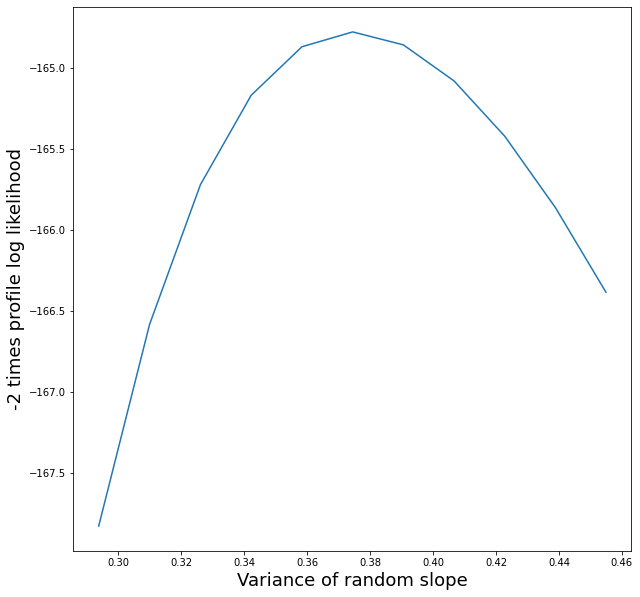

In [47]:
plt.figure(figsize=(10,10))
plt.plot(likev[:,0], 2*likev[:,1])
plt.xlabel("Variance of random slope", size=18)
plt.ylabel("-2 times profile log likelihood", size=18);

In [53]:
res.cov_re.values[0,0]

0.37447790745065823

In [54]:
re = res.cov_re.values[0,0]
with warnings.catch_warnings():
    # Parameter is often on the boundary
    warnings.simplefilter("ignore", ConvergenceWarning)
    likev = res.profile_re(1, 're', dist_low=.5*re, dist_high=0.8*re)

plt.figure(figsize=(10, 8))
plt.plot(likev[:,0], 2*likev[:,1])
plt.xlabel("Variance of random slope", size=17)
lbl = plt.ylabel("-2 times profile log likelihood", size=17);

IndexError: index 1 is out of bounds for axis 0 with size 1

In [46]:
res.cov_re.values[0,0]

0.37447790745065823